# Data from

A systematic evaluation of filter Unsupervised Feature Selection methods

SaúlSolorio-Fernández J.Ariel Carrasco-OchoaJosé Fco.Martínez-Trinidad

In [1]:
library(data.table)
library(ggplot2)

# Tables 19 and 20
dtr <- read.csv("./data/DSUFS75-time.csv",sep=',')

dtr <- as.data.table(dtr)

# Tables 1 and 2
dtz <- read.table("./data/DSUFS75-size.csv",sep=',',header=TRUE)
dtz <- as.data.table(dtz)

# Converting from wide to long format
ldtr <- melt(dtr, id.vars = c("Dataset"), variable.name = "method",value.name = "rtime")

setkey(ldtr,Dataset)
setkey(dtz,Dataset)

# Merging tables
# https://rstudio-pubs-static.s3.amazonaws.com/52230_5ae0d25125b544caab32f75f0360e775.html
ldtr <- dtz[ldtr]

### Numer of features vs execution time per UFS method

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 150 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 150 rows containing missing values (geom_point).”


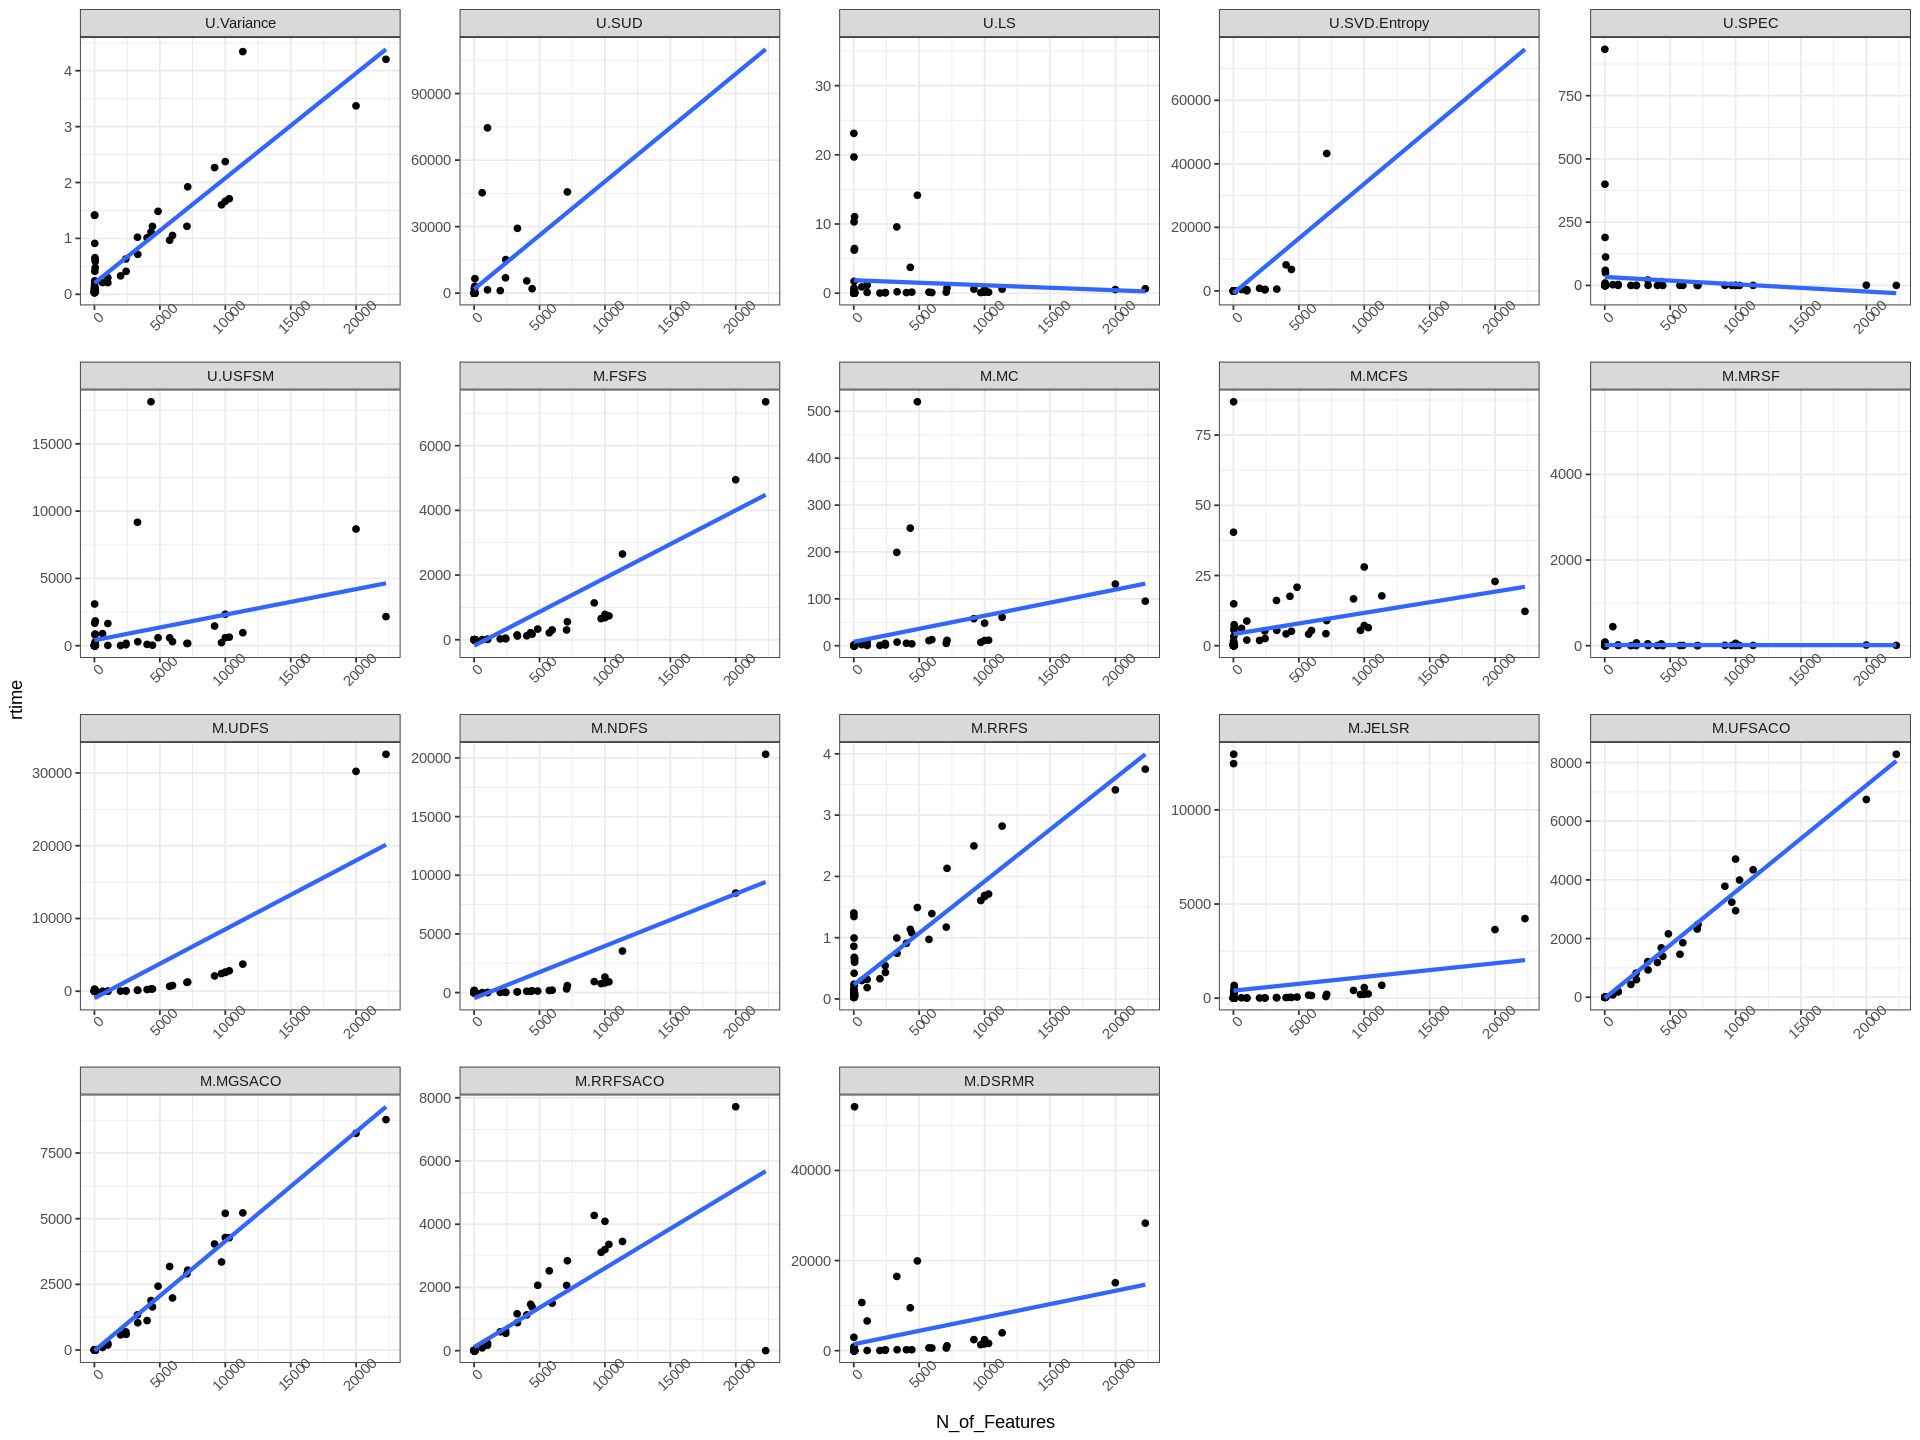

In [2]:
options(repr.plot.width = 16, repr.plot.height = 12)
p <- ggplot(ldtr,aes(x=N_of_Features,y=rtime)) + geom_point() + 
  stat_smooth(method=lm,se=F,lwd=1.2,fullrange=T)+theme_bw() +
  facet_wrap(~method, scales = "free")

# Vertical rotation of x axis text
p <- p + theme(axis.text.x = element_text(angle = 45))
p

### Testing eleaps on the `M.UFSACO` method

`geom_smooth()` using formula 'y ~ x'



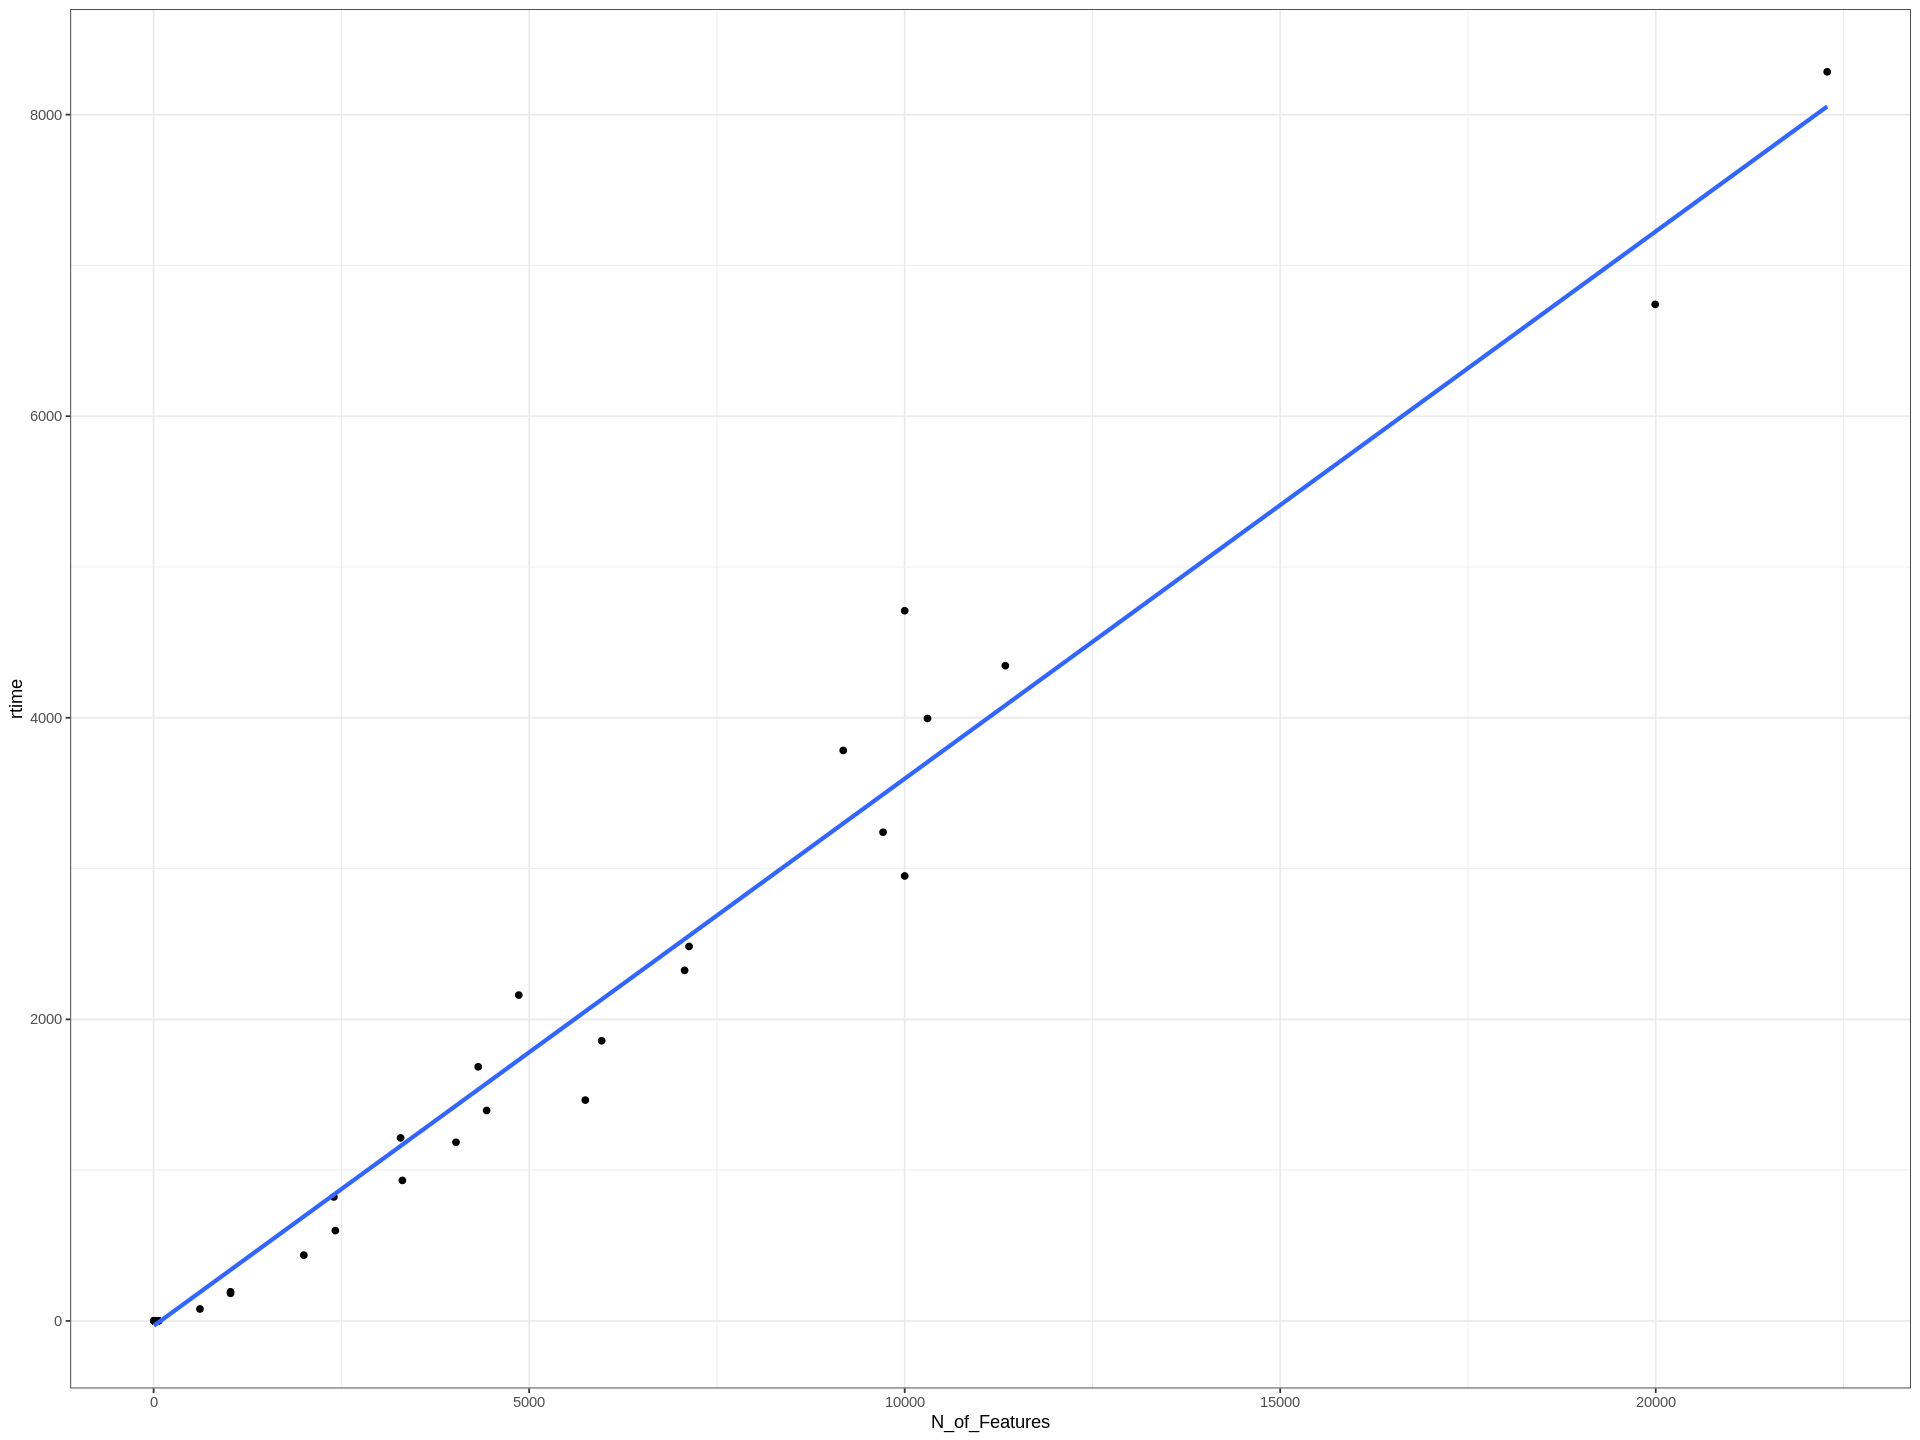

In [3]:
ggplot(na.omit(ldtr[method == "M.UFSACO"]),aes(x=N_of_Features,y=rtime)) + geom_point() + 
  stat_smooth(method=lm,se=F,lwd=1.2,fullrange=T)+theme_bw()

In [11]:
library(leaps)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



### Pipes and tibbles
https://r4ds.had.co.nz/pipes.html

https://r4ds.had.co.nz/tibbles.html

In [14]:
# Load data and remove rows with missing data
(
  t_ufsaco <- na.omit(ldtr[method == "M.UFSACO",-c("Dataset", "method")]) %>%
    as_tibble
  )

N_of_Objects,N_of_Features,N_of_Classes,rtime
<int>,<int>,<int>,<dbl>
72,7129,2,2483.426
200,10000,2,4709.873
226,69,24,0.575
205,25,6,0.065
1993,4862,2,2161.037
111,11340,3,4345.196
1440,1024,20,193.336
174,9182,11,3783.277
62,2000,2,436.344


### Best subsets `exhaustive search` method

In [16]:
best_subset <- regsubsets(rtime ~ ., t_ufsaco, nvmax = 3)
summary(best_subset)

Subset selection object
Call: regsubsets.formula(rtime ~ ., t_ufsaco, nvmax = 3)
3 Variables  (and intercept)
              Forced in Forced out
N_of_Objects      FALSE      FALSE
N_of_Features     FALSE      FALSE
N_of_Classes      FALSE      FALSE
1 subsets of each size up to 3
Selection Algorithm: exhaustive
         N_of_Objects N_of_Features N_of_Classes
1  ( 1 ) " "          "*"           " "         
2  ( 1 ) " "          "*"           "*"         
3  ( 1 ) "*"          "*"           "*"         

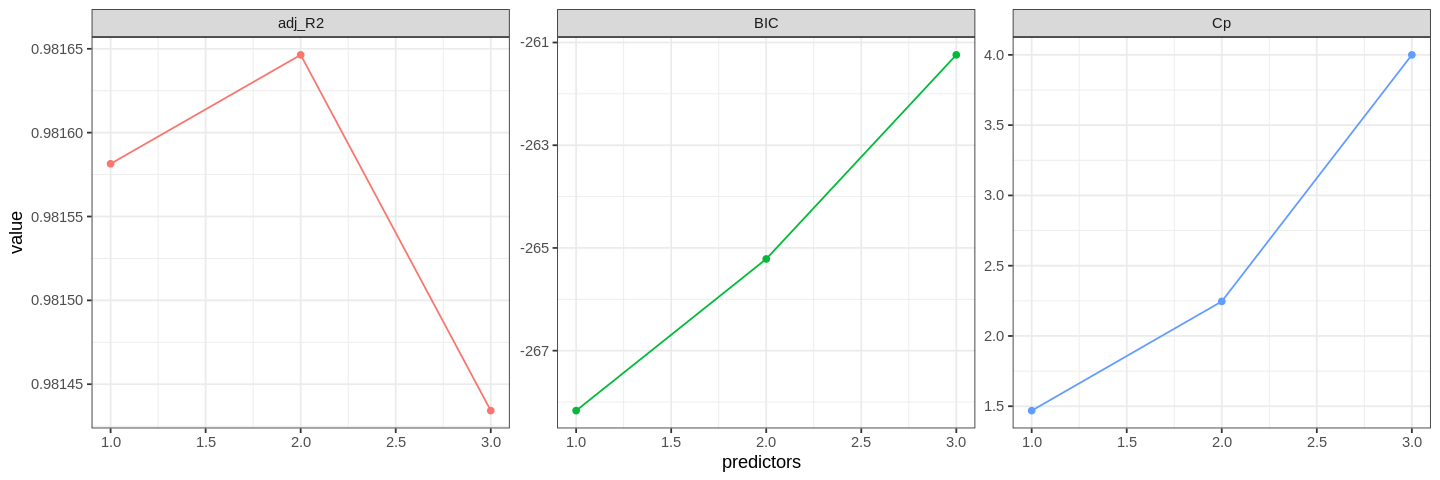

In [19]:
options(repr.plot.width = 12, repr.plot.height = 4)

results <- summary(best_subset)

# extract and plot results
tibble(predictors = 1:3,
       adj_R2 = results$adjr2,
       Cp = results$cp,
       BIC = results$bic) %>%
  gather(statistic, value, -predictors) %>%
  ggplot(aes(predictors, value, color = statistic)) +
  geom_line(show.legend = F) +
  geom_point(show.legend = F) +
  facet_wrap(~ statistic, scales = "free")+
  theme_bw()

In [33]:
model <- lm(data = t_ufsaco, rtime ~ N_of_Features + N_of_Classes)
pmodel <- stats::predict(model, newdata=t_ufsaco)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



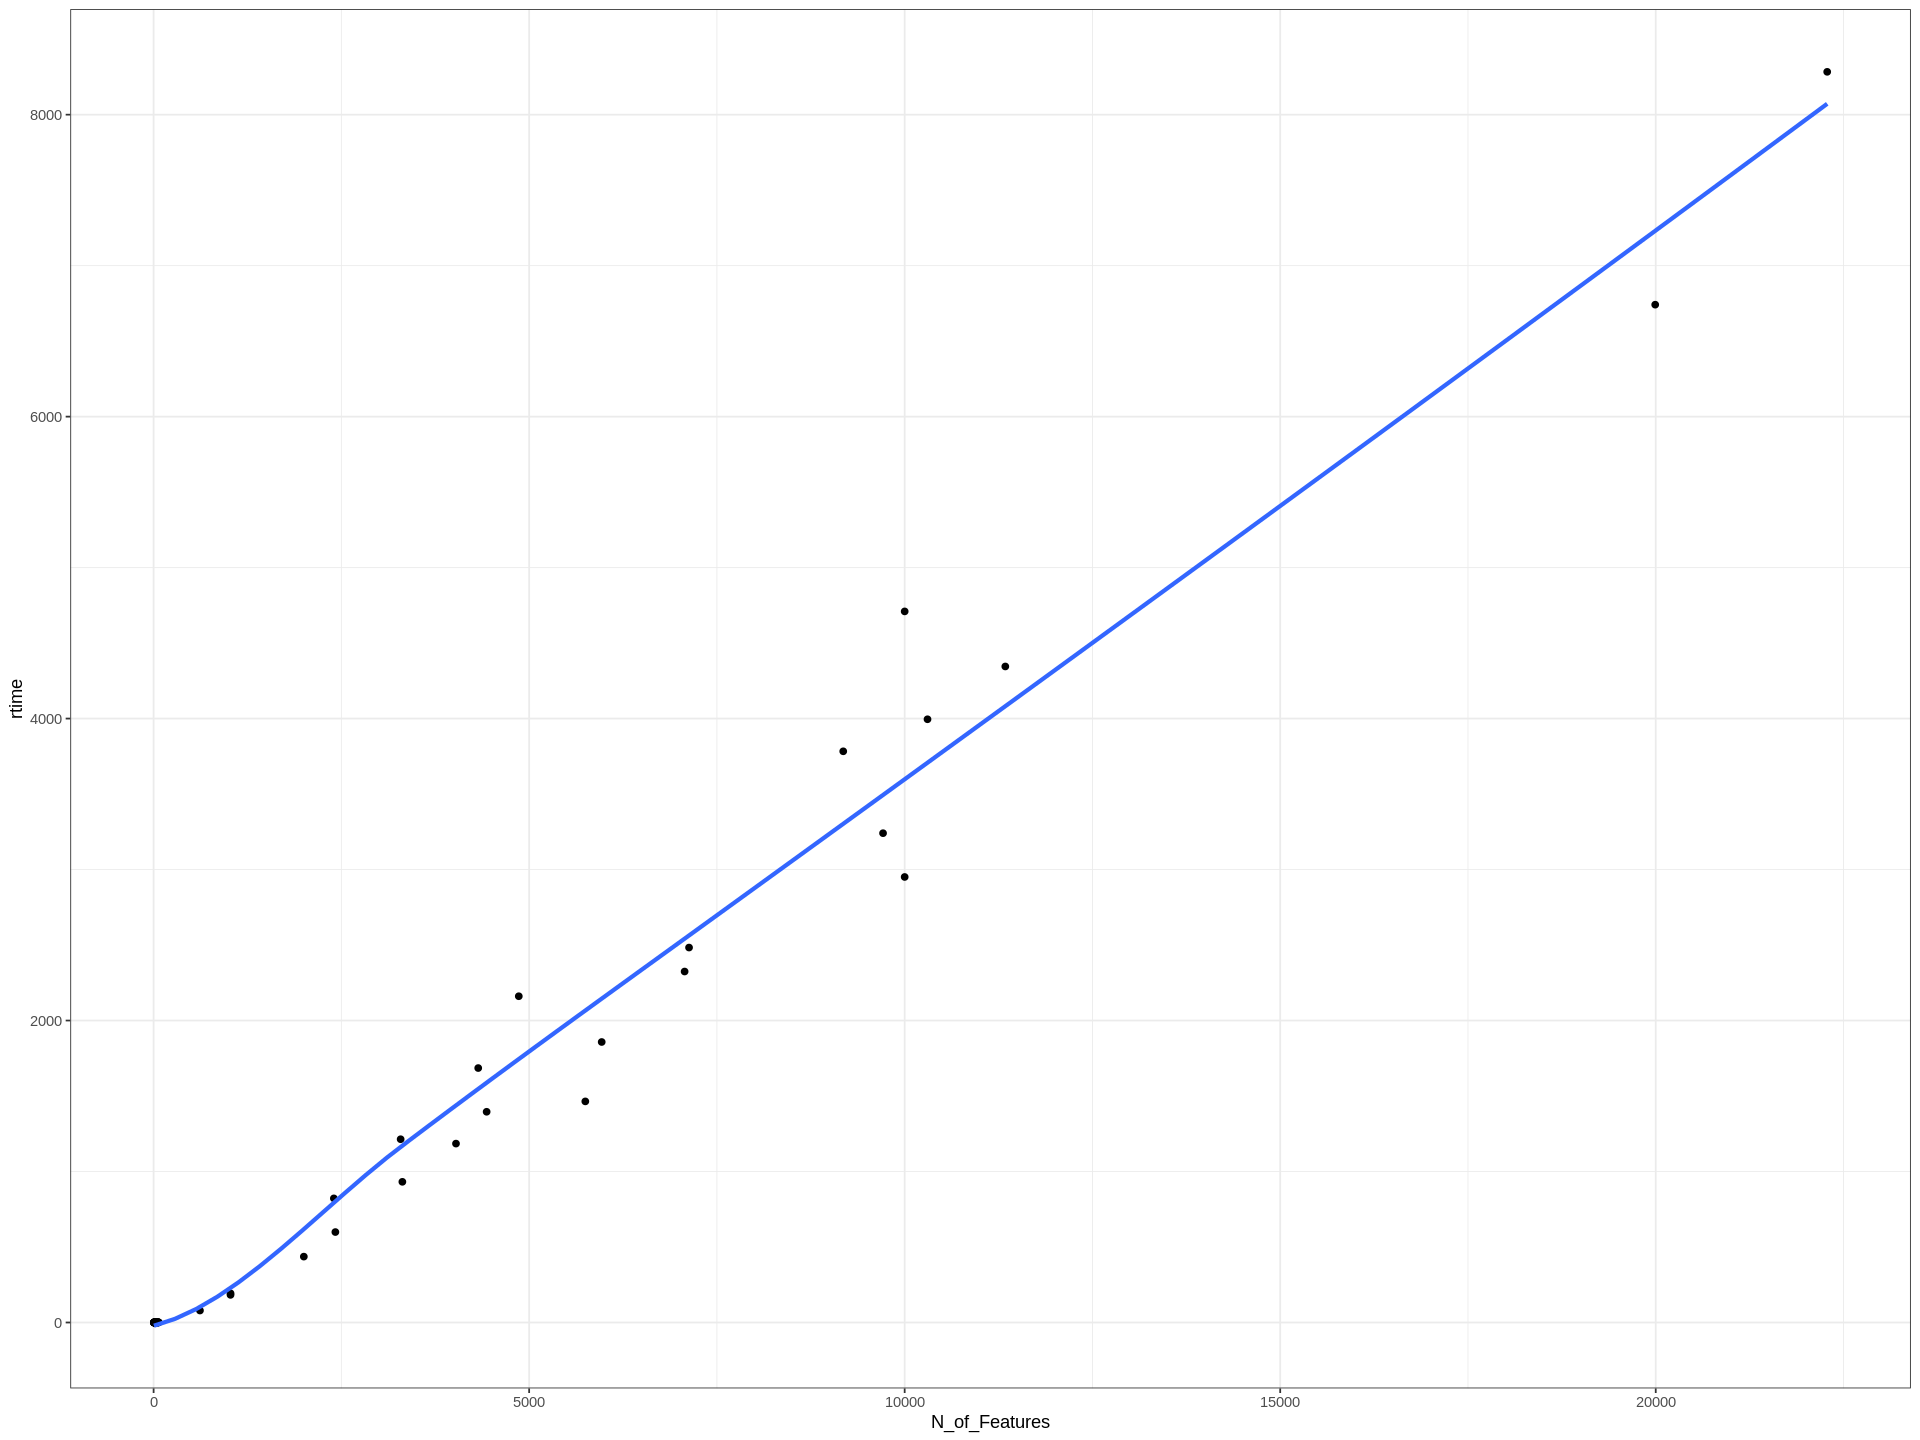

In [35]:
options(repr.plot.width = 16, repr.plot.height = 12)

ggplot(t_ufsaco) + geom_point(aes(x=N_of_Features,y=rtime)) + 
  stat_smooth(data=t_ufsaco,aes(x=N_of_Features, y=pmodel),se=F,lwd=1.2,fullrange=T)+
  theme_bw()